In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('../data/eeaao.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

p_id     Season               Player   Nation  Pos  \
0  Patrick van Aanholt-NED-1990  2017-2018  Patrick van Aanholt   nl NED  1.0   
1       Rolando Aarons-ENG-1995  2017-2018       Rolando Aarons  eng ENG  5.0   
2       Rolando Aarons-ENG-1995  2017-2018       Rolando Aarons  eng ENG  5.0   
3        Ignazio Abate-ITA-1986  2017-2018        Ignazio Abate   it ITA  1.0   
4      Aymen Abdennour-TUN-1989  2017-2018      Aymen Abdennour   tn TUN  1.0   

            Squad                Comp  Age  Born  Playing Time, MP  ...  \
0  Crystal Palace  eng Premier League   26  1990                28  ...   
1   Newcastle Utd  eng Premier League   21  1995                 4  ...   
2   Hellas Verona          it Serie A   21  1995                11  ...   
3           Milan          it Serie A   30  1986                17  ...   
4       Marseille          fr Ligue 1   27  1989                 8  ...   

   Carries, Carries  Carries, TotDist  Carries, PrgDist  Carries, PrgC  \
0             717.0            3714.0            1966.0           46.0   
1              37.0             380.0             127.0            7.0   
2             105.0             712.0             352.0            9.0   
3             386.0            1802.0            1124.0           20.0   
4             296.0            1522.0             829.0            2.0   

   Carries, 1/3  Carries, CPA  Carries, Mis  Carries, Dis  Receiving, Rec  \
0          33.0           7.0          37.0          18.0           711.0   
1           3.0           3.0           4.0           6.0            39.0   
2          11.0           2.0           9.0          13.0           125.0   
3          18.0           0.0           7.0           6.0           563.0   
4           1.0           0.0           0.0           1.0           278.0   

   Receiving, PrgR  
0             86.0  
1              4.0  
2             31.0  
3             65.0  
4              0.0  

[5 rows x 147 columns]

In [22]:
for col in df.columns:
    print(col)
print(df.shape)

p_id
Season
Player
Nation
Pos
Squad
Comp
Age
Born
Playing Time, MP
Playing Time, Starts
Playing Time, Min
Playing Time, 90s
Performance, Gls
Performance, Ast
Performance, G+A
Performance, G-PK
Performance, PK
Performance, PKatt
Performance, CrdY
Performance, CrdR
Expected, xG
Expected, npxG
Expected, xAG
Expected, npxG+xAG
Progression, PrgC
Progression, PrgP
Progression, PrgR
Per 90 Minutes, Gls
Per 90 Minutes, Ast
Per 90 Minutes, G+A
Per 90 Minutes, G-PK
Per 90 Minutes, G+A-PK
Per 90 Minutes, xG
Per 90 Minutes, xAG
Per 90 Minutes, xG+xAG
Per 90 Minutes, npxG
Per 90 Minutes, npxG+xAG
Standard, Gls
Standard, Sh
Standard, SoT
Standard, SoT%
Standard, Sh/90
Standard, SoT/90
Standard, G/Sh
Standard, G/SoT
Standard, Dist
Standard, FK
Standard, PK
Standard, PKatt
Expected, xG.1
Expected, npxG.1
Expected, npxG/Sh
Expected, G-xG
Expected, np:G-xG
Total, Cmp
Total, Att
Total, Cmp%
Total, TotDist
Total, PrgDist
Short, Cmp
Short, Att
Short, Cmp%
Medium, Cmp
Medium, Att
Medium, Cmp%
Long, Cmp
Long

As we can see, there are a lot of columns. In this initial EDA, I aim to investigate how these stats look in 'Real life'.
<br>
We begin by looking at the most simple stats: Goals + Assists and how they are distributed by position. Note that position has been constructed as follows:
| Position number | Position from FBref.com | Position interpretation |
|:----------------|:------------------------|:------------------------|
| 0               | GK                      | Goalie                  |
| 1               | DF                      | Center-Back, Full-Back  |
| 1.5             | DF,FW                   | Wingback                |
| 2               | DF,MF                   | Full-Back               |
| 3               | MF,DF                   | Defensive Midfielder    |
| 4               | MF                      | Midfielder              |
| 5               | MF,FW                   | Attacking midfielder    |
| 5.5             | FW,DF                   | Wide Midfielder         |
| 6               | FW,MF                   | False-9, winger         |
| 7               | FW                      | Pure forward            |


In [271]:
obv1 = df.loc[:, ['Player', 'Age', 'Pos', 'Performance, G+A']]
obv1.head()

Player   Age  Pos  Performance, G+A
0  Patrick van Aanholt  26.0  1.0                 6
1       Rolando Aarons  21.0  5.0                 0
2       Rolando Aarons  21.0  5.0                 0
3        Ignazio Abate  30.0  1.0                 1
4      Aymen Abdennour  27.0  1.0                 0

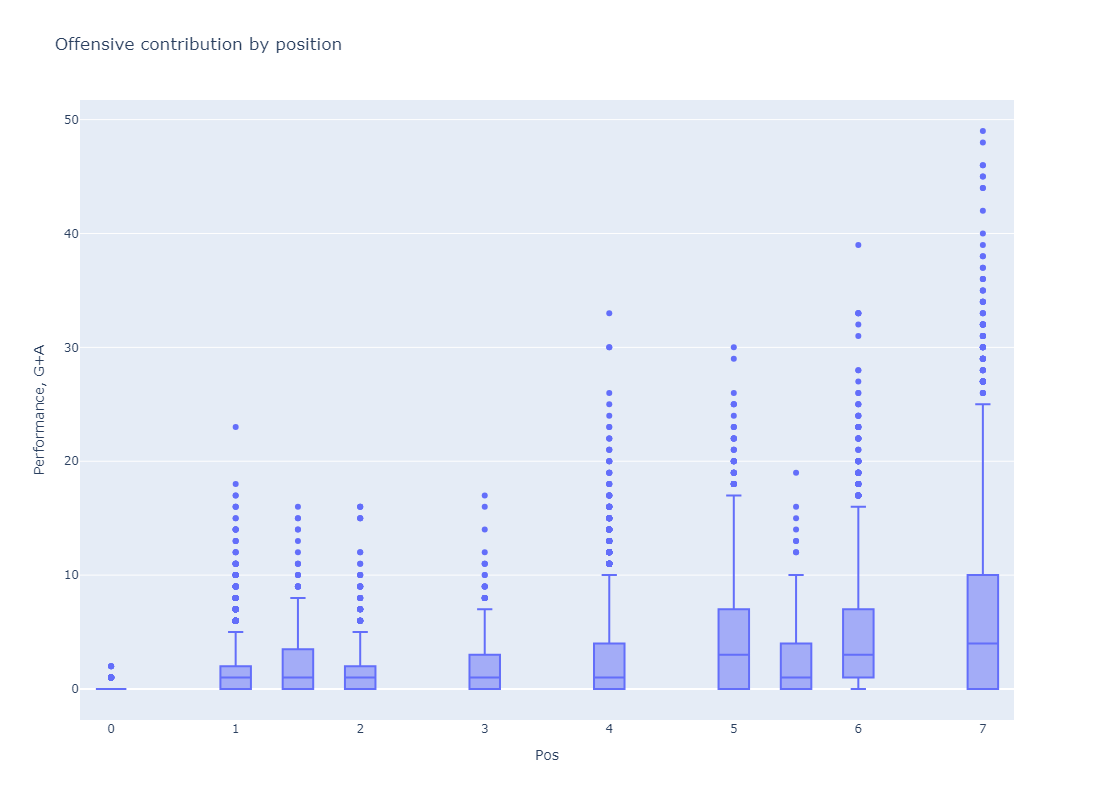

<Figure size 640x480 with 0 Axes>

In [272]:
plt.figure()
box1 = px.box(obv1, x='Pos', y='Performance, G+A', height=800, hover_data=['Player'], title = "Offensive contribution by position")

box1.show()

Looking into some of the outliers:

In [65]:
display(obv1.loc[(obv1['Performance, G+A'] > 1) & (obv1['Pos'] == 0)].head())
display(obv1.loc[(obv1['Performance, G+A'] > 15) & (obv1['Pos'] == 1)].sort_values('Performance, G+A', ascending = False).head())
display(obv1.loc[(obv1['Performance, G+A'] > 35)].sort_values('Performance, G+A', ascending = False).head())


Player   Age  Pos  Performance, G+A
13              Antonio Adán  30.0  0.0                 2
7811   Marc-André ter Stegen  27.0  0.0                 2
11252         Yassine Bounou  30.0  0.0                 2
15391              Pau López  27.0  0.0                 2

Player   Age  Pos  Performance, G+A
17746           Álex Grimaldo  27.0  1.0                23
9441             Filip Kostić  27.0  1.0                18
5406   Trent Alexander-Arnold  20.0  1.0                17
9105             Robin Gosens  26.0  1.0                17
6338             Robin Gosens  25.0  1.0                16

Player   Age  Pos  Performance, G+A
4312         Lionel Messi  31.0  7.0                49
9538   Robert Lewandowski  31.0  7.0                48
1653         Lionel Messi  30.0  7.0                46
6997         Lionel Messi  32.0  7.0                46
12619       Kylian Mbappé  22.0  7.0                45

Now looking into the defensive stats by postition:

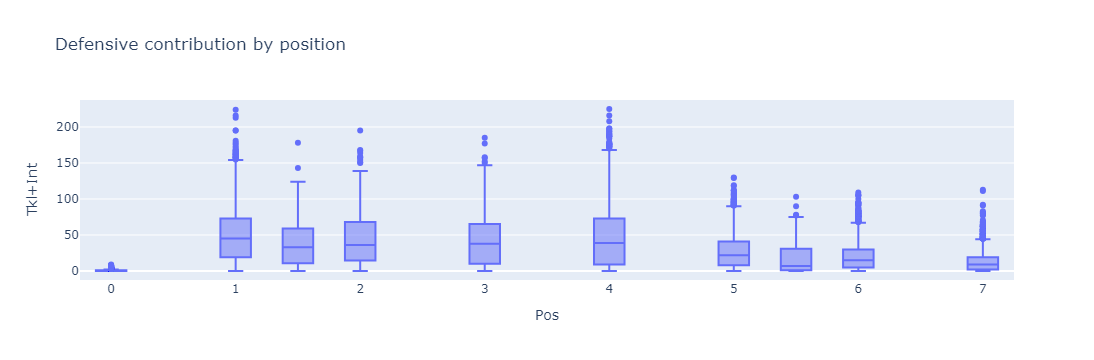

In [236]:
obv1 = df.loc[:, ['Player', 'Age', 'Pos', 'Tkl+Int']]
box2 = px.box(obv1, x='Pos', y='Tkl+Int', height=800, hover_data = ['Player'], title = "Defensive contribution by position")

box2.show()

In [72]:
display(obv1.loc[(obv1['Pos'] == 1)].sort_values('Tkl+Int', ascending = False).head(10))
display(obv1.loc[(obv1['Pos'] == 4)].sort_values('Tkl+Int', ascending = False).head(10))
display(obv1.loc[(obv1['Pos'] == 7)].sort_values('Tkl+Int', ascending = False).head(10))

Player   Age  Pos  Tkl+Int
1002    Frederic Guilbert  22.0  1.0    224.0
8560      Fabien Centonze  24.0  1.0    216.0
5256    Aaron Wan-Bissaka  20.0  1.0    213.0
7990    Aaron Wan-Bissaka  21.0  1.0    195.0
468          Jonny Castro  23.0  1.0    195.0
3233    Domenico Criscito  31.0  1.0    181.0
12474  José Luis Palomino  31.0  1.0    178.0
3676    Frederic Guilbert  23.0  1.0    176.0
18955    Antonee Robinson  25.0  1.0    173.0
13420       Danilo Soares  29.0  1.0    171.0

Player   Age  Pos  Tkl+Int
4448        Wilfred Ndidi  21.0  4.0    225.0
3548   Idrissa Gana Gueye  28.0  4.0    216.0
7116        Wilfred Ndidi  22.0  4.0    208.0
1249         N'Golo Kanté  26.0  4.0    198.0
18732       João Palhinha  28.0  4.0    198.0
524         Renaud Cohade  32.0  4.0    196.0
15848       João Palhinha  27.0  4.0    194.0
7448          Declan Rice  20.0  4.0    193.0
8085      Laurent Abergel  27.0  4.0    191.0
8179       Benjamin André  29.0  4.0    190.0

Player   Age  Pos  Tkl+Int
1834     Lucas Ocampos  23.0  7.0    113.0
13928  Felipe Anderson  29.0  7.0    111.0
1952      Ivan Perišić  28.0  7.0     92.0
10991  Felipe Anderson  28.0  7.0     91.0
816    Roberto Firmino  25.0  7.0     83.0
19023      Bukayo Saka  21.0  7.0     81.0
18801      Ayoze Pérez  30.0  7.0     81.0
19503     Lamine Yamal  16.0  7.0     80.0
15956    Gonzalo Plata  21.0  7.0     78.0
16155      Bukayo Saka  20.0  7.0     77.0

Notice that Midfielders and Full-backs go toe-to-toe with centerbcks. 
<br>
Next, I want to look at top 5 players in different categories and look at what stats they all stand out in. 

In [4]:
attackers = ['Mohamed Salah', 'Erling Haaland', 'Karim Benzema', 'Kylian Mbappé', 'Robert Lewandowski', 'Harry Kane', 'Cristiano Ronaldo']
dribblers = ['Vinicius Júnior', 'Thiago Alcántara', 'Jamal Musiala', 'Phil Foden', 'Rodrygo', 'Lionel Messi', 'Eden Hazard']
passers = ['Kevin De Bruyne-BEL-1991', 'Luka Modrić-CRO-1985', 'Trent Alexander-Arnold-ENG-1998', 'Joshua Kimmich-GER-1995', 'Rodri-ESP-1996']
defenders = ['Virgil van Dijk', 'Sergio Ramos', 'Raphaël Varane', 'Antonio Rüdiger', 'Rúben Dias']
top_players = [attackers, dribblers, passers, defenders]

For my attackers, I want to study how clinical they are, as well as their shot selection
<br>
For my dribblers, I want to study how their courage is numerized, and how successful their dribbles are.
<br>
For my passers, I want to see how accurate their passing is as well as how much their passing progresses the game (compared to their dribbling?)
<br>
For my defenders, I want to see how successful their tackles are. 

Attackers:
- G - XG indicated how much they overperform their XG (showing how clinical they are)
- npxG/Sh non-penalty expected goals per shot (on average, what quality of shots are they taking)
- SCA, SCA90 More wholistic statistic on how dynamic the players offence is?

In [94]:
# A dataframe of our chosen attacking players. 
a_df = df.loc[(df['Player'].isin(attackers)) & (df['Playing Time, MP'] > 3)] # playtime estriction for transfers. 
# Note that ronaldo has an absolutely shambolic season (his last with MU) where he only played half a season and one of his datapoints is skewed. 

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



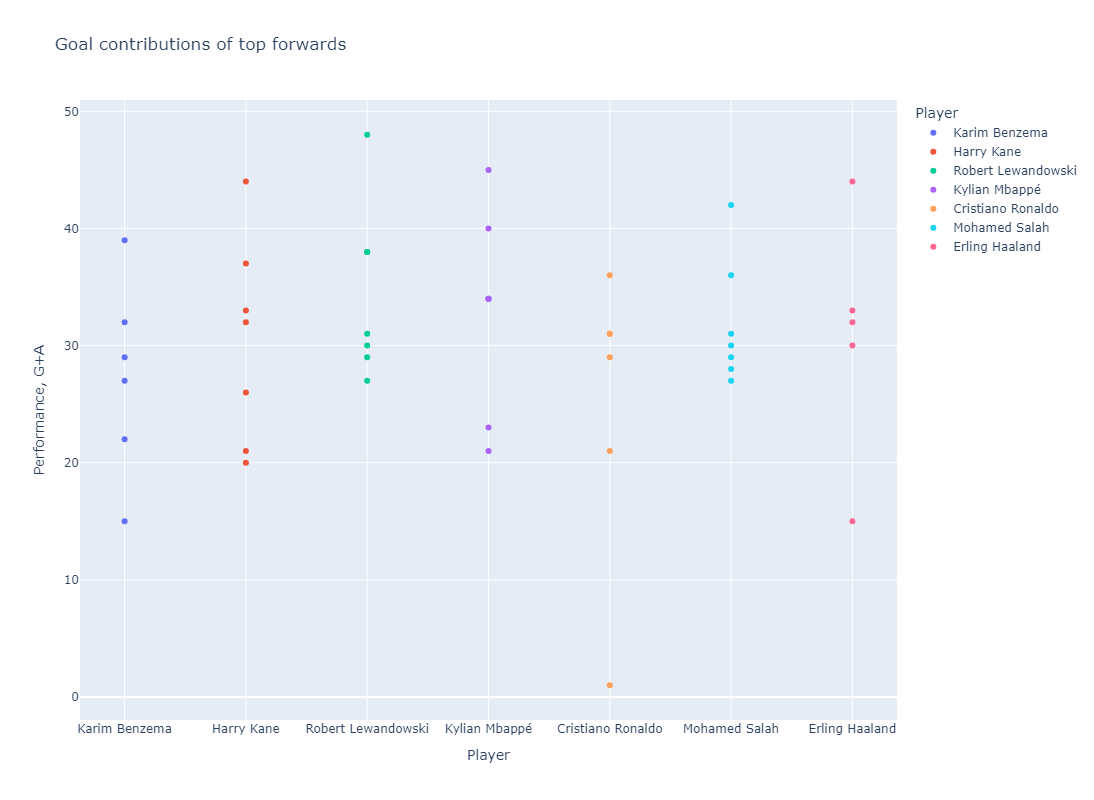

In [243]:
px.scatter(a_df, x = 'Player', y = 'Performance, G+A', hover_data=['Age'], title = 'Goal contributions of top forwards', width= 1200, height = 800, color = 'Player')

From this we can see 3 observations:
- Lewandowski has been consistently the best forward of the last 7 years
- Ronaldo, despite being (one of) the best forwards of this generation, is clearly in the tail end of his career.
- Salah is the most consistent (smallest variance) forward of the selected, regularly putting in good seasons. 

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



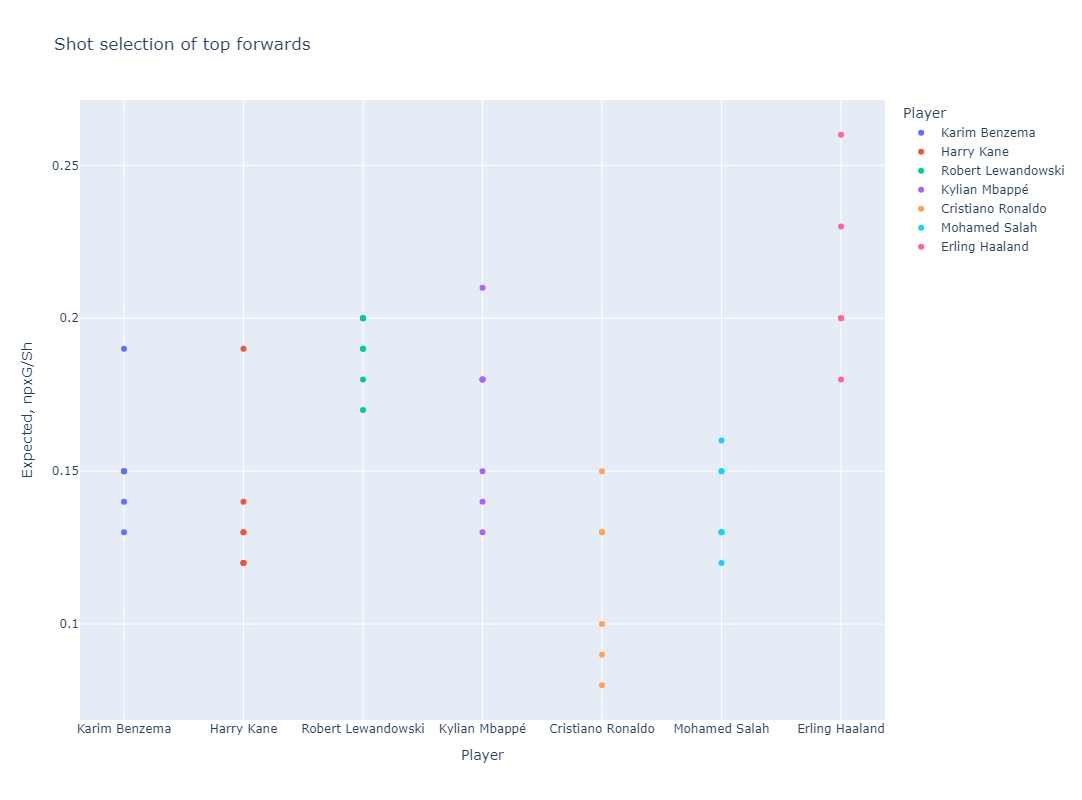

In [244]:
px.scatter(a_df, x = 'Player', y = 'Expected, npxG/Sh', hover_data = ['Standard, Dist'], title = 'Shot selection of top forwards', width= 1200, height = 800, color = 'Player')

This statistic (npxG/Sh) shows how difficult of shots the player chooses per season. Lower values indicates that for each shot has a lower xG (implying the shot is harder). So players like Haaland or Lewandowski who are the purest strikers in the list, tend to sit in the box and wait for the best (easiest / highest xG) chances to shoot. Then there are players like Ronaldo and Salah who are willing to take riskier shots / pull  the trigger early / like to shoot from distance. 

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



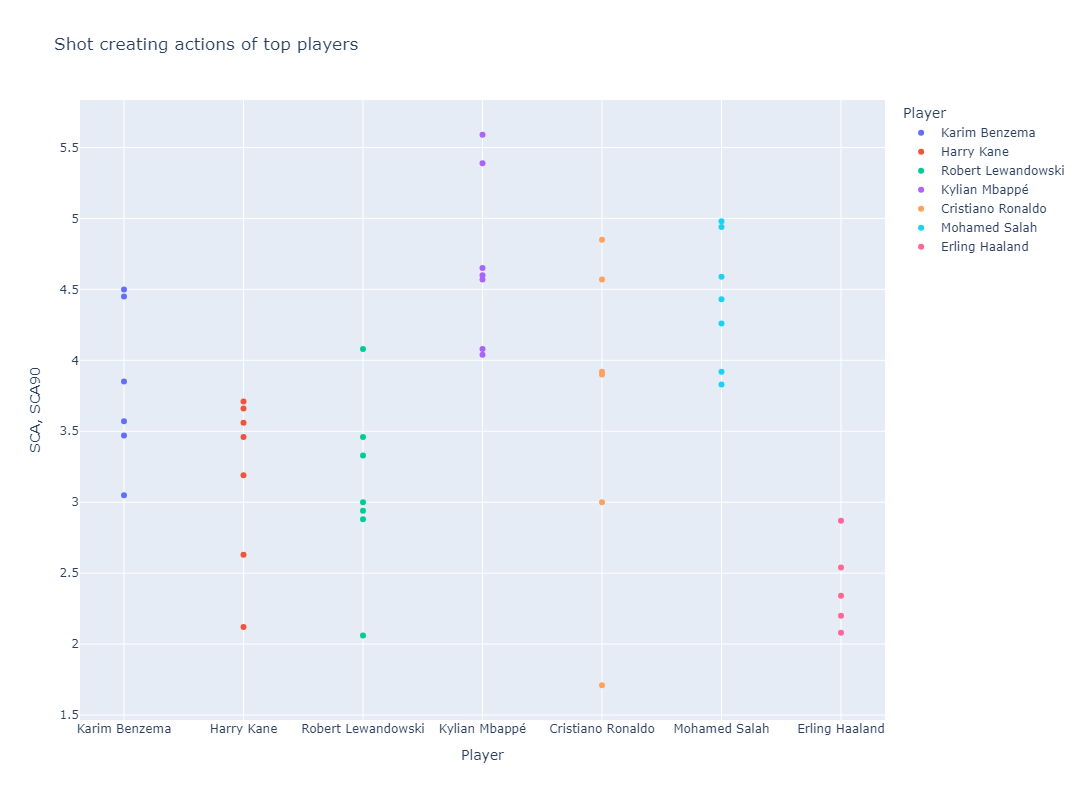

In [245]:
px.scatter(a_df, x = 'Player', y = 'SCA, SCA90', title = 'Shot creating actions of top players', width= 1200, height = 800, color = 'Player')

Looking at SCA90 (Shot creatig actions per 90), we can get a sense of which players bring a more comlete offence to their game. Who is crating more danger when they play? <br>
So in 90 minutes, Players like Mbappe and Salah make **their teams** extremely dangerous by creating lots of chances, whether themselves or for their teammates. They press, pass, make runs... TLDR, their game is broad. 
<br>
As a result, these kinds of players dont dissapear during big games (not CL) Because even when they are not scoring, theyre still making chances. 
<br>
On the other hand, There are players like Haaland (and maybe kane in a bad season) Have very 1-dimensional games and if a defender puts in a good shift, can eliminate that player and make them dissappear. 

Dribblers:
- dribble success rate 
- 'courage' can be defined as what ratio of their progressive distance is to total distance (i.e when they dribble, how often are they charging FORWARD)?

In [164]:
# dataframe of chosendribblers
d_df = df.loc[(df['Player'].isin(dribblers)) & (df['Playing Time, MP'] > 3) & (df['Take-Ons, Att'] > 10)]

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



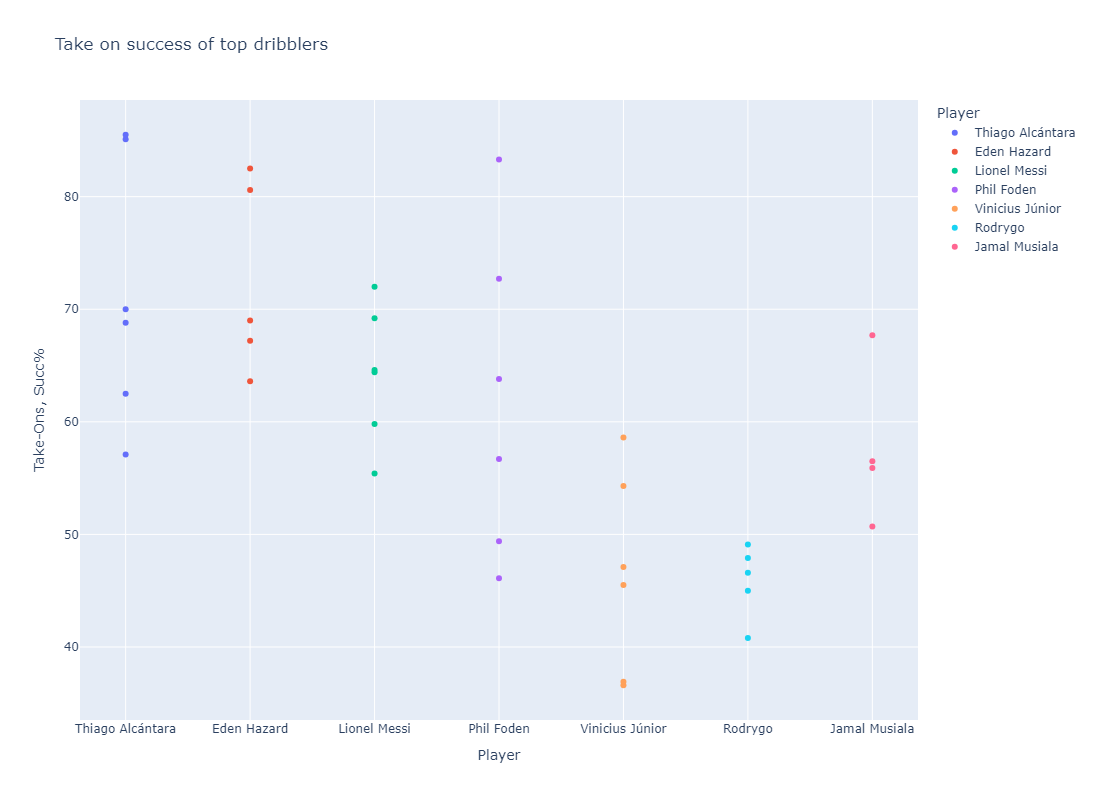

In [246]:
px.scatter(d_df, x = 'Player', y = 'Take-Ons, Succ%', hover_data = ['Take-Ons, Att', 'Age'], title='Take on success of top dribblers', width= 1200, height = 800, color = 'Player') # Want to add a label of number of take-ons

The most basic stat for dribbler, take on success percentage. One observation to note is that the midfielders (thiago, messi, foden, musiala) tend to fare better than the wingers (vini and rodrygo) presumably because they are dribbling midfielders instead of full backs. However, these numbers need to be differenciated between whether it is taking on vs press resistance. 
<br>
Below, we can see that the deeper a player plays, its about being effective so as not to lose the ball in dangerous areas, whereas further up the pitch where you are allowed to take risks, the success tends to go lower. 
<br> 
I have 3 impressive datapoints to observe:
- Thiago has two seasons with >85% success rate which implies that if he takes a defender on, he pretty much guranteed to retain the ball.
- Close behind, at age 19, Foden with a 83% sucees rate as an attacking midfielder, showing creativity, technique and courage.
- Indicating his greatness as one of the best dribbler in PL history, Eden hazards success rate never dips below 60%, indicating he is ALWAYs more likely to pass a player than lose the ball. 
- What makes Messi special, is that he is able to have just as good (and better) success rates than other top dribblers despite attempting 3-5 times as many dribbles as his colleagues (more opportunity for failure, but retains success rate)

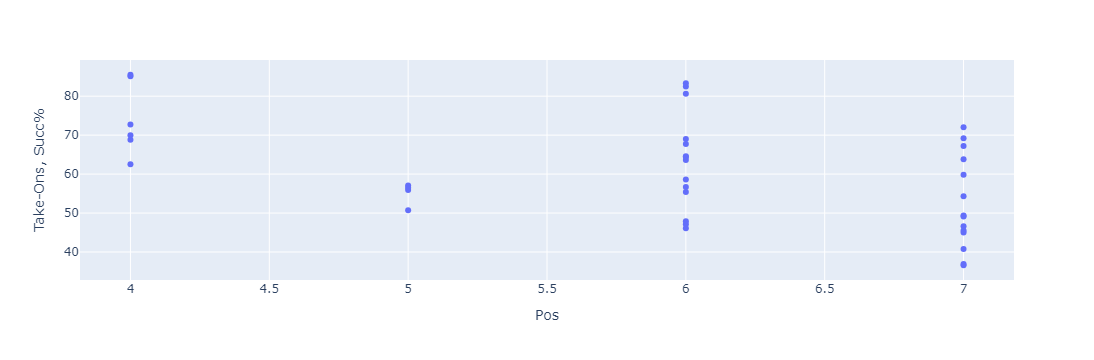

In [166]:
px.scatter(d_df, x = 'Pos', y = 'Take-Ons, Succ%', hover_data = ['Player', 'Age', 'Take-Ons, Att']) 

In [183]:
d_df['Carries, Courage'] = d_df.loc[:, 'Carries, PrgDist'] / d_df.loc[:, 'Carries, TotDist']

C:\Users\abdel\AppData\Local\Temp\ipykernel_19700\3885228795.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



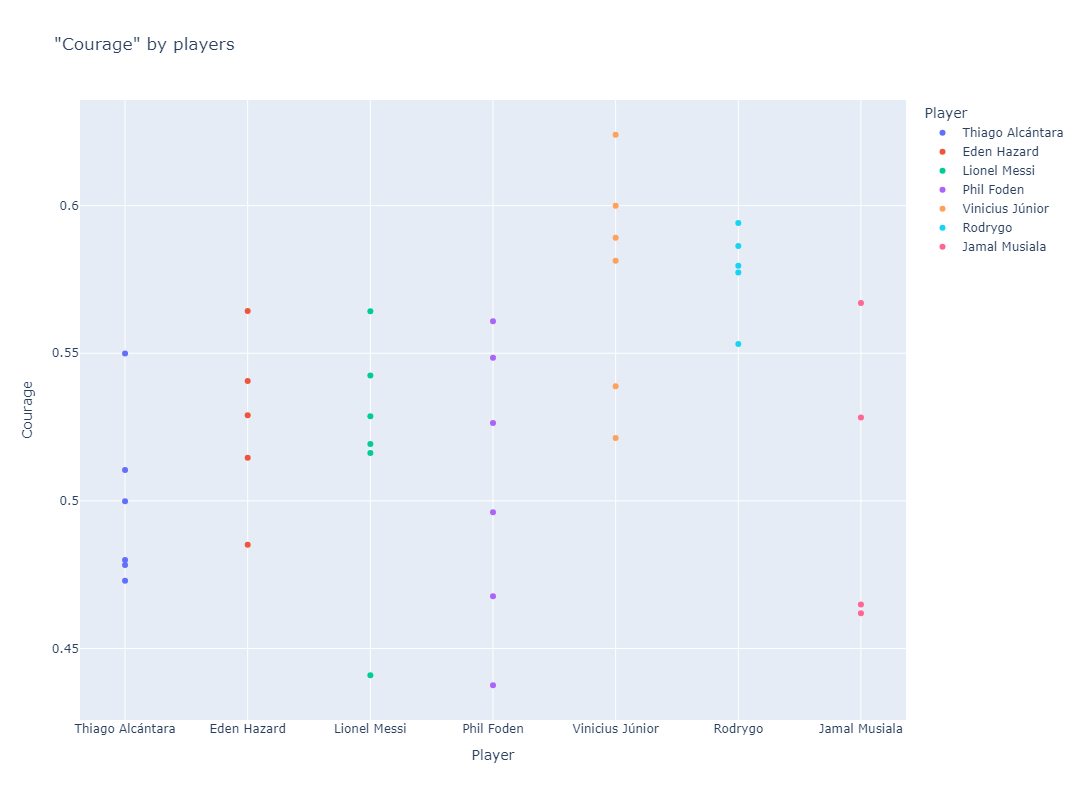

In [248]:
px.scatter(d_df, x = 'Player', y = 'Courage', hover_data = ['Player', 'Age', 'Pos'], title = '\"Courage\" by players', width= 1200, height = 800, color = 'Player') 

Passers:
- Total, PrgDist / Total, TotDist. 'Courage' This custom statistic will measure what portion of a players passing distance prograsses the play
- Short, Cmp%
- Medium, Cmp%
- Long, Cmp%
- SCA, SCA90

In [5]:
# dataframe for passers
p_df = df.loc[(df['p_id'].isin(passers)) & (df['Playing Time, MP'] > 3)]
p_df.head()

Unnamed: 0.1                  Player   Nation  Pos            Squad  \
56              56  Trent Alexander-Arnold  eng ENG  1.0        Liverpool   
619            619         Kevin De Bruyne   be BEL  4.0  Manchester City   
1284          1284          Joshua Kimmich   de GER  1.0    Bayern Munich   
1683          1683             Luka Modrić   hr CRO  4.0      Real Madrid   
2116          2116                   Rodri   es ESP  4.0       Villarreal   

                    Comp   Age    Born  Playing Time, MP  \
56    eng Premier League  18.0  1998.0                19   
619   eng Premier League  26.0  1991.0                37   
1284       de Bundesliga  22.0  1995.0                29   
1683          es La Liga  31.0  1985.0                26   
2116          es La Liga  21.0  1996.0                37   

      Playing Time, Starts  ...  Carries, TotDist  Carries, PrgDist  \
56                      18  ...            3232.0            1791.0   
619                     36  ...           12041.0            7119.0   
1284                    26  ...            7203.0            3512.0   
1683                    23  ...            7343.0            3626.0   
2116                    36  ...            8308.0            3591.0   

      Carries, PrgC  Carries, 1/3  Carries, CPA  Carries, Mis  Carries, Dis  \
56             39.0          38.0           9.0          18.0          13.0   
619           183.0         174.0          30.0          64.0          60.0   
1284           79.0          58.0          15.0          21.0           5.0   
1683           82.0          64.0          15.0          26.0          20.0   
2116           28.0          31.0           4.0          23.0          22.0   

      Receiving, Rec  Receiving, PrgR                             p_id  
56             910.0            126.0  Trent Alexander-Arnold-ENG-1998  
619           2615.0            259.0         Kevin De Bruyne-BEL-1991  
1284          1699.0            232.0          Joshua Kimmich-GER-1995  
1683          1431.0             78.0             Luka Modrić-CRO-1985  
2116          1950.0             26.0                   Rodri-ESP-1996  

[5 rows x 141 columns]

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


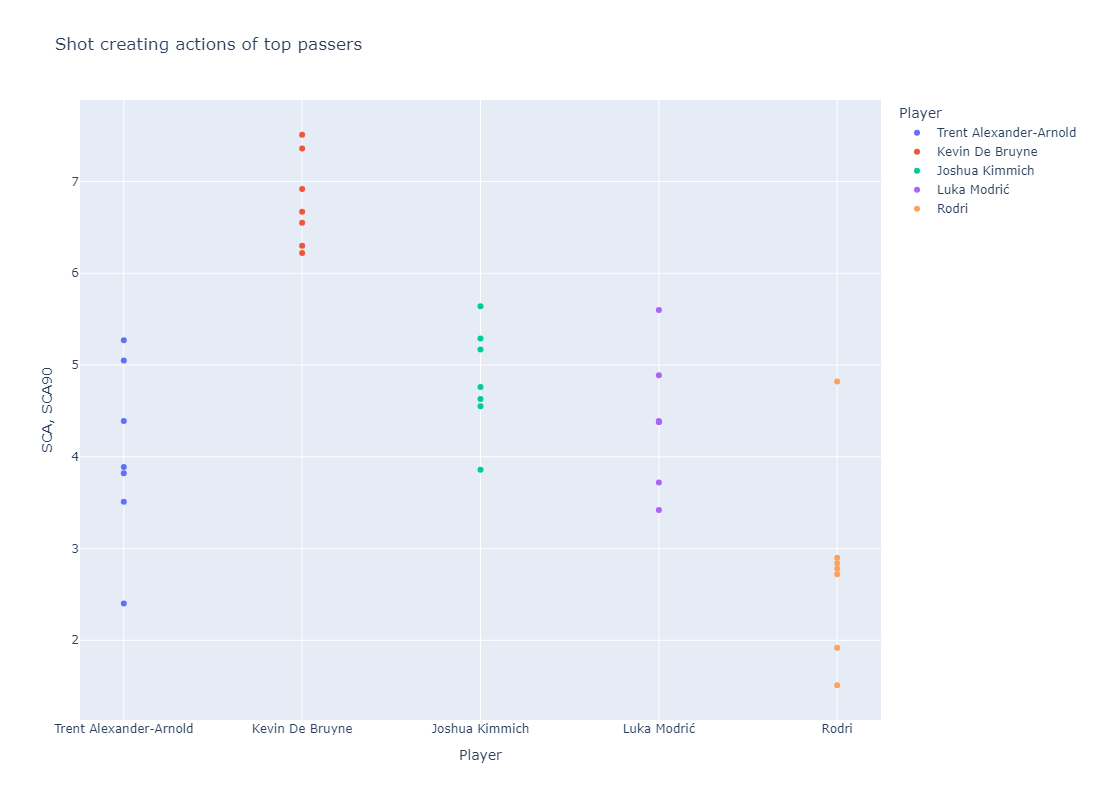

In [6]:
px.scatter(p_df, x = 'Player', y = 'SCA, SCA90', hover_data = ['Player', 'Age', 'Pos'],
           title='Shot creating actions of top passers', width= 1200, height = 800, color = 'Player') 

From the graph above, we can CLEARLY see that KDB is the most offensively dangerous player, creating more shots per 90 than any other player (in fact, his worst season is better than any other top passers best season). 
<br>
However, This statistic doesnt seem to do Trent alexander arnold the justice he deserves as a progressor of the ball since he is a defender and his passes originate from much deeper. So we will define a new statistic that will try and encapsulate this attribute (by looking at what the ratio of passes made is forward, i.e how much their passing prograsses the play). 

In [8]:
p_df['Passing, Courage'] = p_df.loc[:, 'Total, PrgDist'] / p_df.loc[:, 'Total, TotDist']

C:\Users\abdel\AppData\Local\Temp\ipykernel_16792\464685691.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



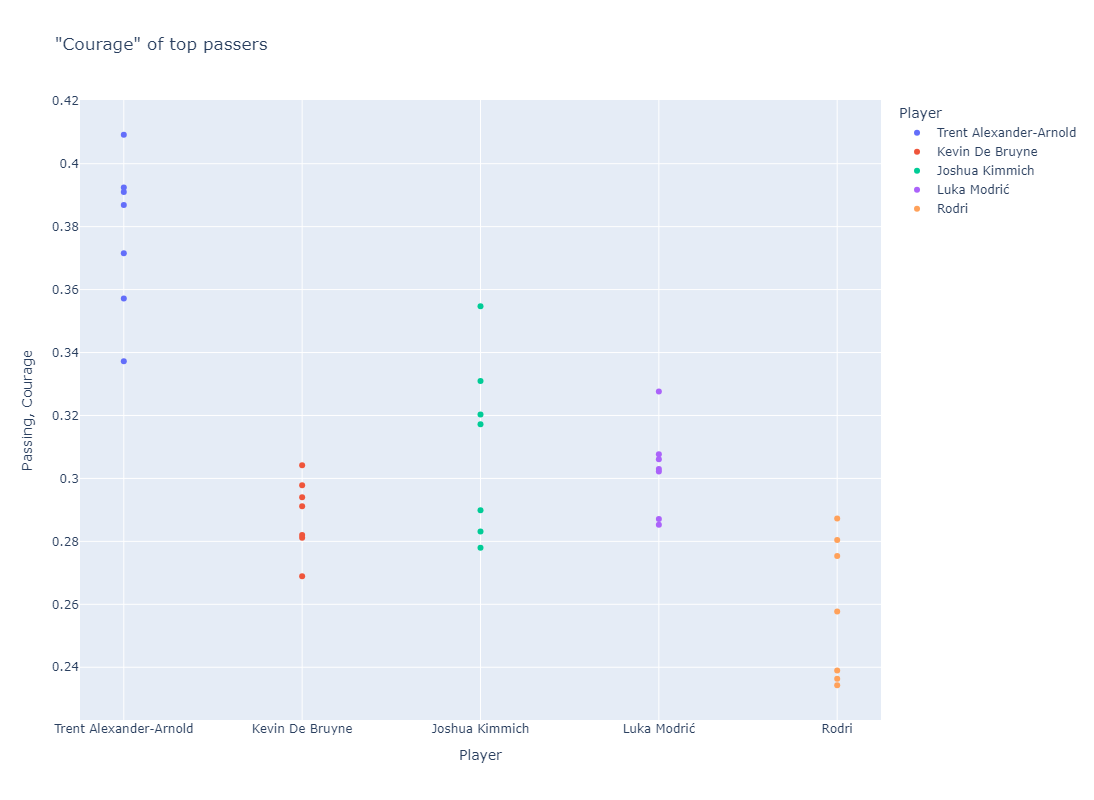

In [9]:
px.scatter(p_df, x = 'Player', y = 'Passing, Courage', hover_data = ['Player', 'Age', 'Pos'], 
           title='\"Courage\" of top passers', width= 1200, height = 800, color = 'Player') 

Now, using this 'courage' stat (that can also be seen as a 'vision' stat), we can see that trent, despite being the deepest player of the 5, plays the ball forward (takes more risks) than any other player. Conversely, Rodri, The most accurate passer of the bunch at all distances (as seen in the next 3 graphs) is the safest passer, choosing passes that are simpler and safer. 

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



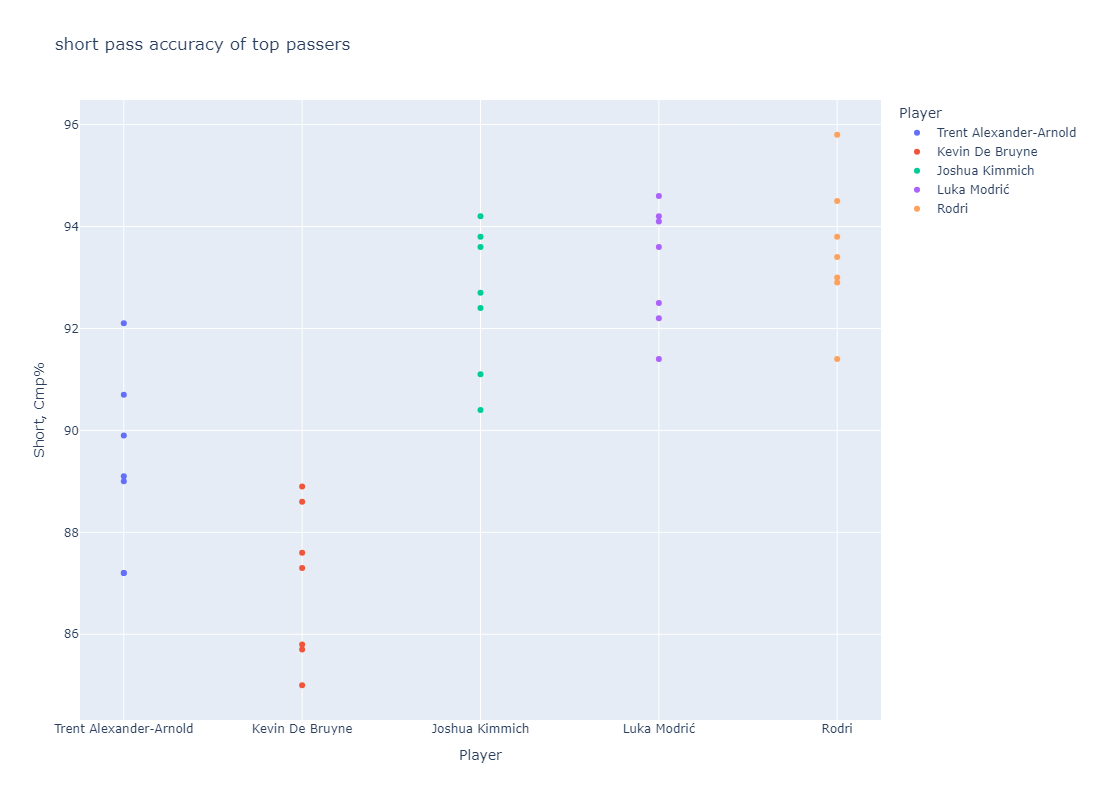

In [14]:
px.scatter(p_df, x = 'Player', y = 'Short, Cmp%', hover_data = ['Player', 'Age', 'Short, Att'],
           title='short pass accuracy of top passers', width= 1200, height = 800, color = 'Player') 

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



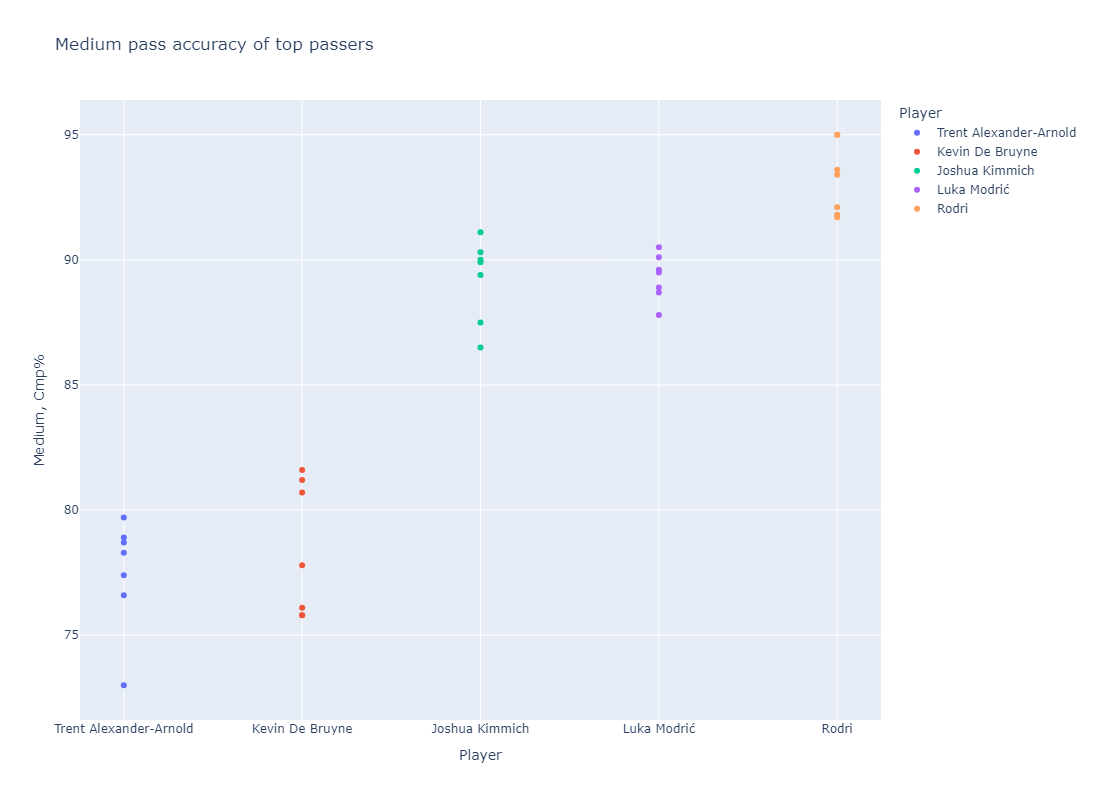

In [15]:
px.scatter(p_df, x = 'Player', y = 'Medium, Cmp%', hover_data = ['Player', 'Age', 'Medium, Att'], 
          title='Medium pass accuracy of top passers', width= 1200, height = 800, color = 'Player') 

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



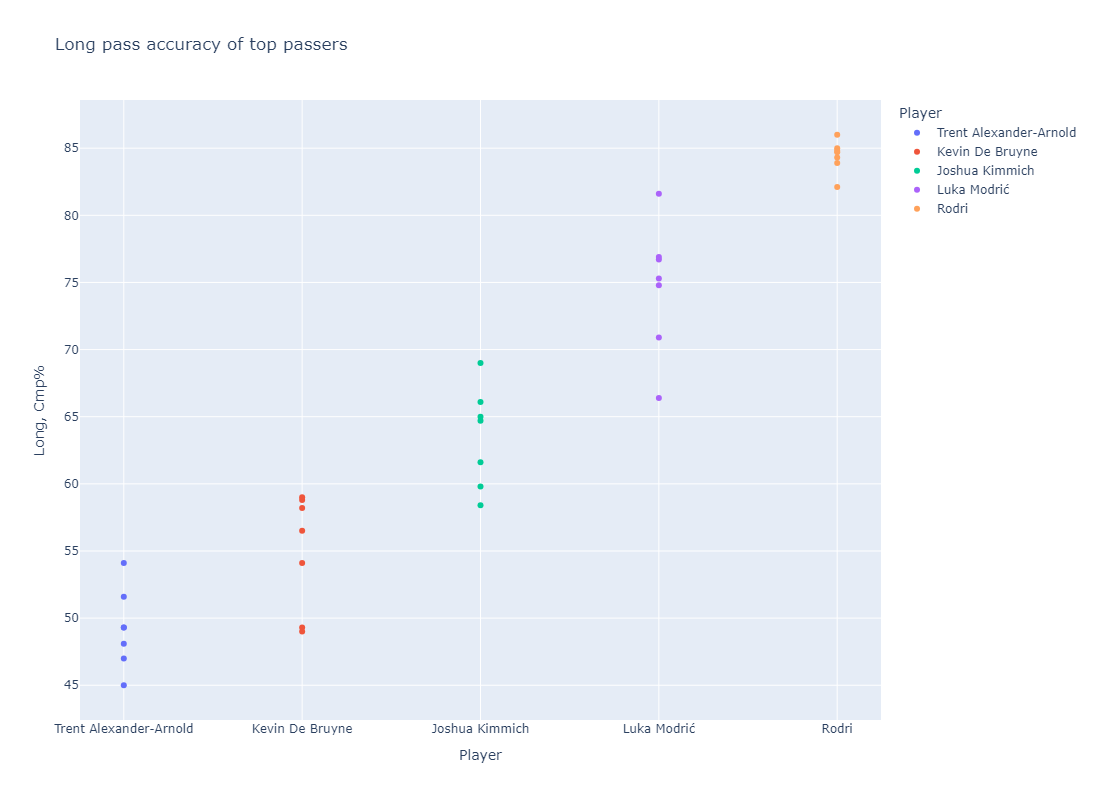

In [16]:
px.scatter(p_df, x = 'Player', y = 'Long, Cmp%', hover_data = ['Player', 'Age', 'Long, Att'],
          title='Long pass accuracy of top passers', width= 1200, height = 800, color = 'Player') 

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



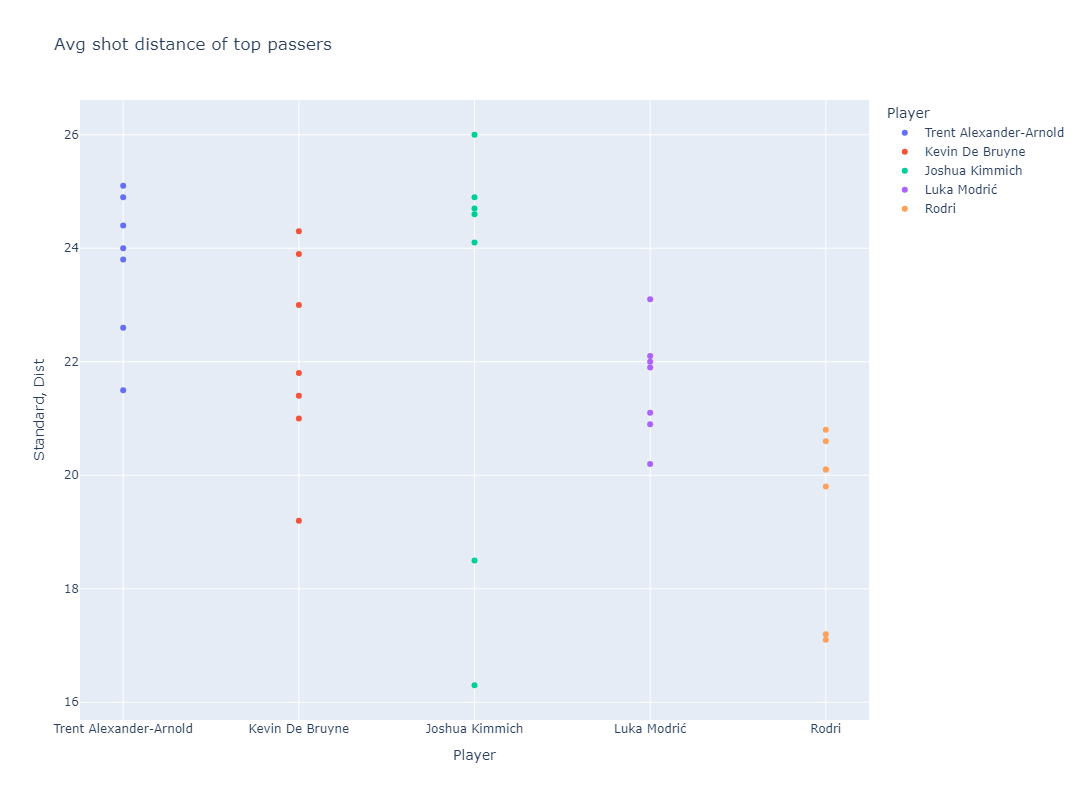

In [17]:
px.scatter(p_df, x = 'Player', y = 'Standard, Dist', hover_data = ['Player', 'Age'],
          title='Avg shot distance of top passers', width= 1200, height = 800, color = 'Player') 

Knowing that these elite passers tend to be all-round great strikers of the ball, I also wanted to investigate how far out they take their shots. Once again, we see that TAA's courage carries over to shooting, as he tends to take shots from outside the box (knowing that his accuracy can compensate for the distance)
<br>
Lastly, We look below at another custom stat, Key passes per 90. I.e in a game, on average, How many passes are these players making that lead to key chances (an assist or shot). Once again, KDB is the runaway winner, with Rodri being a lot more involved in build up play rather than passing in the final third. 

C:\Users\abdel\AppData\Local\Temp\ipykernel_16792\3256905560.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



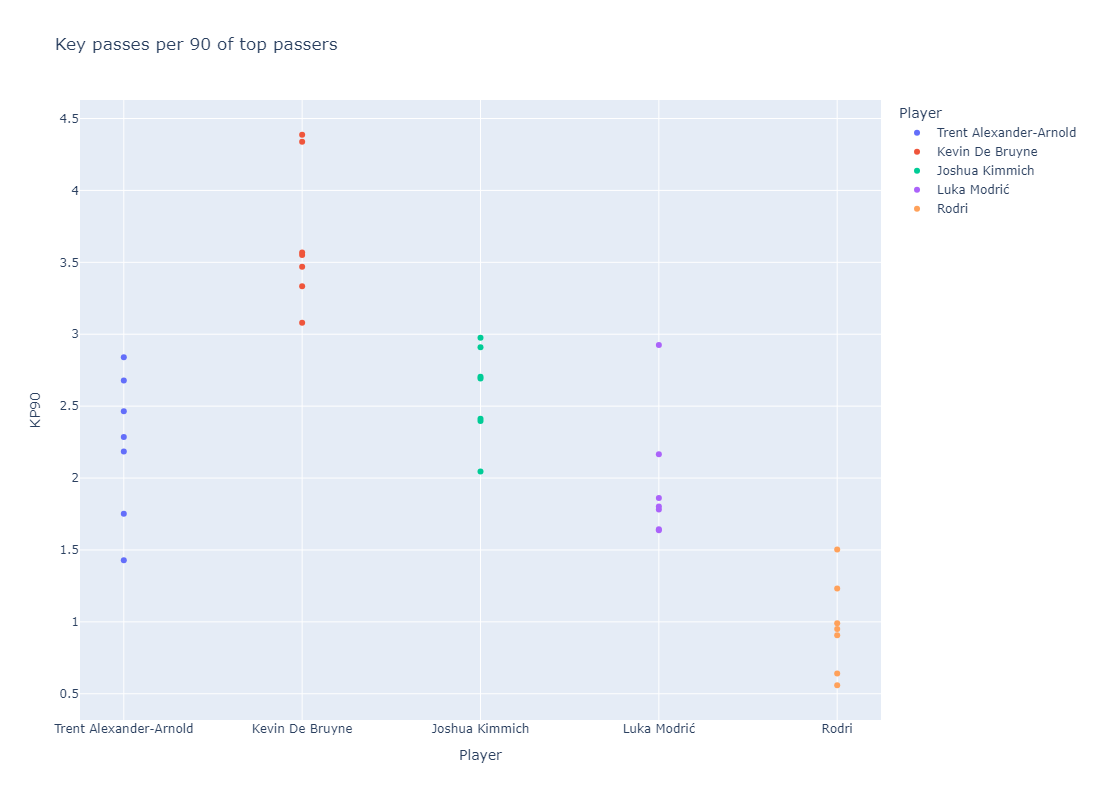

In [19]:
p_df['KP90'] = p_df.loc[:, 'KP'] / p_df.loc[:, 'Playing Time, 90s']
px.scatter(p_df, x = 'Player', y = 'KP90', hover_data = ['Player', 'Age'],
          title='Key passes per 90 of top passers', width= 1200, height = 800, color = 'Player')  # Key passes

#### Note to the reader:
Ive noticed that Rodri has too many data points (any given player shouldnt have more than 8 or 9 since there are 7 seasons and a player isnt likely to transfer more than twice during that time). This is because there is another player called Rodri who is being combined with rodri. Therefore i will come up with a hashing function that combined name, nation, and birthyear to ensure uniqueness of player. This column is now labelled `p_id`

Defenders:
- Challenges, Tkl%
- Blocks, Blocks
- Tackles, Def 3rd / (Tackles, Def 3rd + Tackles, Mid 3rd) Indicates how much they delay

In [260]:
# dataframe for defenders
df_df = df.loc[(df['Player'].isin(defenders)) & (df['Playing Time, MP'] > 3)]

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



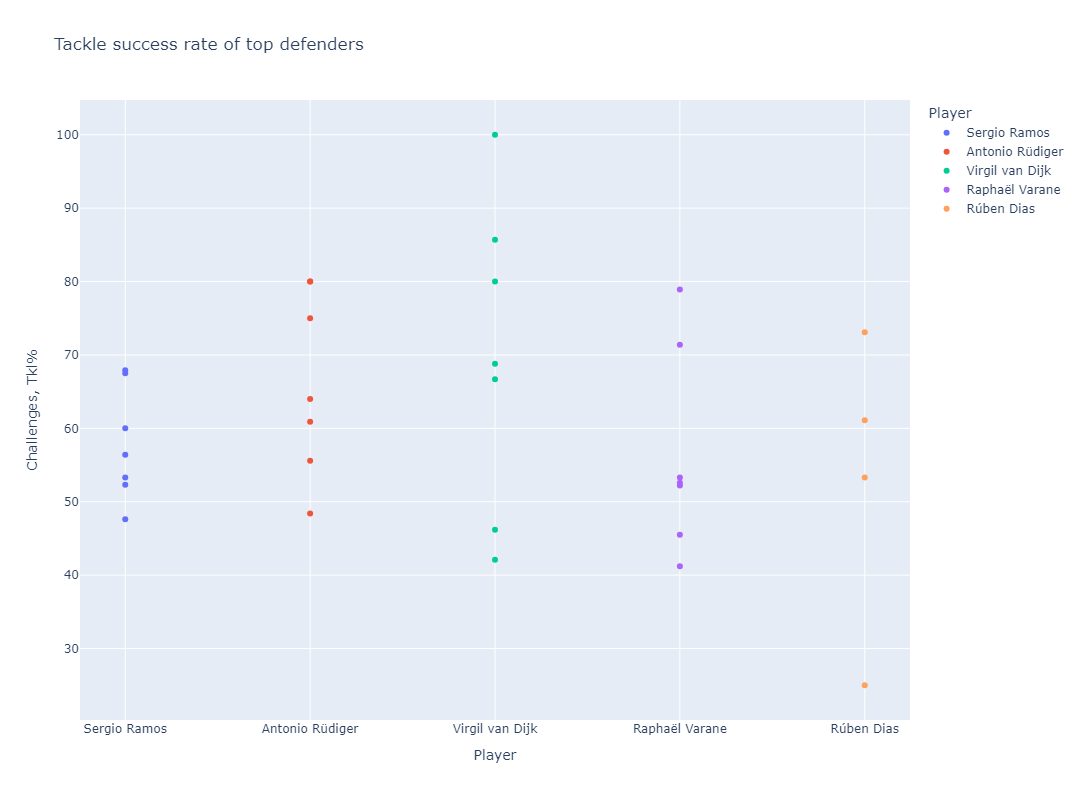

In [261]:
px.scatter(df_df, x = 'Player', y = 'Challenges, Tkl%', hover_data = ['Player', 'Age', 'Challenges, Att'], title='Tackle success rate of top defenders', width= 1200, height = 800, color = 'Player') 

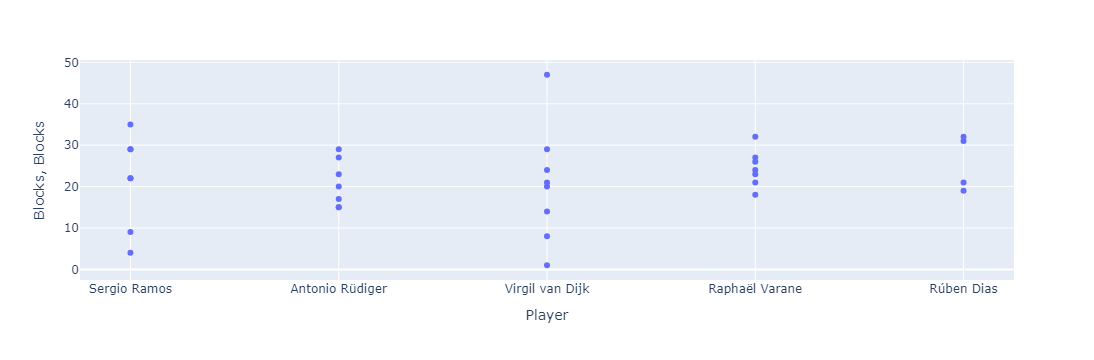

In [219]:
px.scatter(df_df, x = 'Player', y = 'Blocks, Blocks', hover_data = ['Player', 'Age', 'Challenges, Att']) 

In [263]:
# Tackles, Def 3rd / (Tackles, Def 3rd + Tackles, Mid 3rd)
df_df['Delay ratio'] = df_df.loc[:, 'Tackles, Def 3rd'] / (df_df.loc[:, 'Tackles, Def 3rd'] + df_df.loc[:, 'Tackles, Mid 3rd'])

C:\Users\abdel\AppData\Local\Temp\ipykernel_19700\2966270972.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [224]:
df_df.loc[:, ['Player', 'Tackles, Def 3rd', 'Tackles, Mid 3rd', 'Delay ratio']].sort_values('Delay ratio')

Player  Tackles, Def 3rd  Tackles, Mid 3rd  Delay ratio
10739  Virgil van Dijk               1.0               2.0     0.333333
17411       Rúben Dias              14.0              21.0     0.400000
16015     Sergio Ramos              14.0              18.0     0.437500
11601       Rúben Dias              11.0              12.0     0.478261
2534   Virgil van Dijk               7.0               7.0     0.500000
14550       Rúben Dias              10.0              10.0     0.500000
13112     Sergio Ramos               6.0               6.0     0.500000
7922    Raphaël Varane              15.0              14.0     0.517241
10350  Antonio Rüdiger              16.0              14.0     0.533333
16526  Virgil van Dijk              13.0              11.0     0.541667
2055      Sergio Ramos              22.0              18.0     0.550000
10244     Sergio Ramos               8.0               6.0     0.571429
19385   Raphaël Varane              10.0               7.0     0.588235
7408      Sergio Ramos              26.0              17.0     0.604651
8781        Rúben Dias              13.0               8.0     0.619048
19383  Virgil van Dijk              24.0              13.0     0.648649
13224  Antonio Rüdiger              29.0              15.0     0.659091
2157   Antonio Rüdiger              20.0              10.0     0.666667
4723      Sergio Ramos              25.0              12.0     0.675676
13647  Virgil van Dijk              11.0               5.0     0.687500
5194   Virgil van Dijk              26.0              11.0     0.702703
16124  Antonio Rüdiger              12.0               5.0     0.705882
7522   Antonio Rüdiger              19.0               7.0     0.730769
2535    Raphaël Varane              20.0               7.0     0.740741
18895     Sergio Ramos              32.0              11.0     0.744186
2533   Virgil van Dijk               6.0               2.0     0.750000
16528   Raphaël Varane              18.0               6.0     0.750000
10740   Raphaël Varane              16.0               5.0     0.761905
13651   Raphaël Varane              21.0               6.0     0.777778
5195    Raphaël Varane              25.0               7.0     0.781250
7921   Virgil van Dijk              18.0               5.0     0.782609
18999  Antonio Rüdiger              18.0               4.0     0.818182
4821   Antonio Rüdiger              27.0               6.0     0.818182

C:\Users\abdel\anaconda3\envs\base_env\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



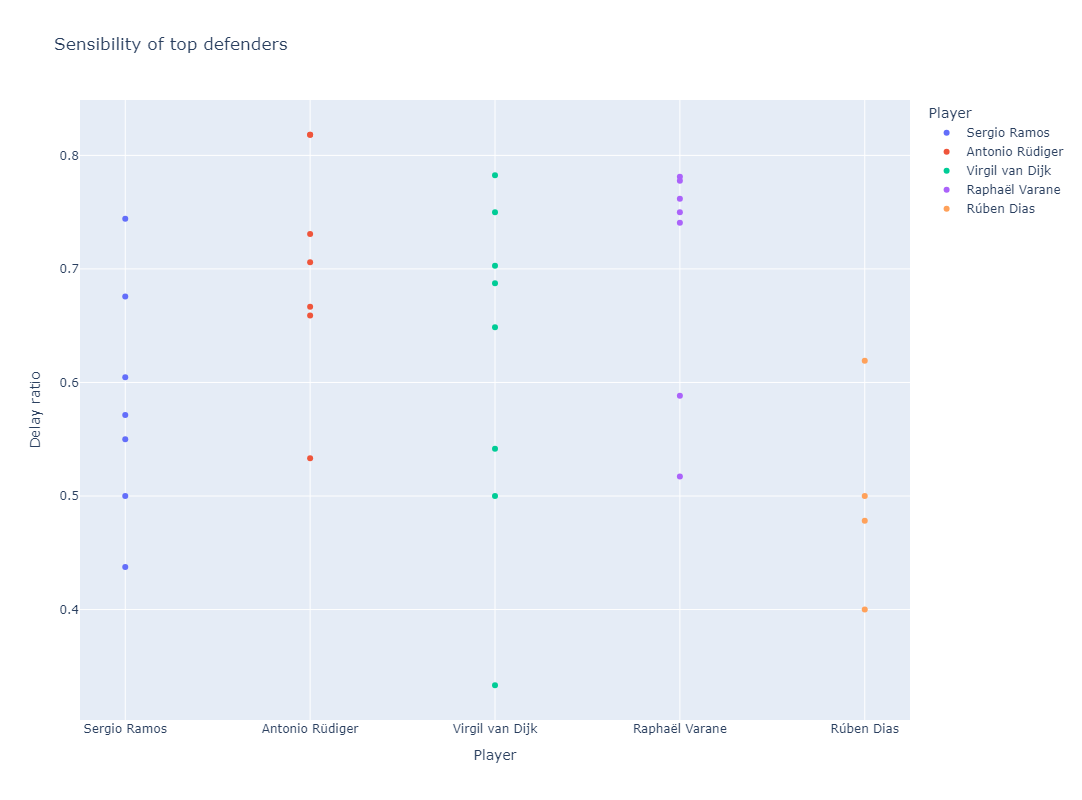

In [264]:
px.scatter(df_df, x = 'Player', y = 'Delay ratio', hover_data = ['Player', 'Age', 'Tackles, Def 3rd'], title='Sensibility of top defenders', width= 1200, height = 800, color = 'Player') 